# Building Beautiful Plots with Matplotlib: PythonPH September 2015
Tweet questions about this notebook [@stefsy](http://www.twitter.com/stefsy)

### Who are We? 

We are [Thinking Machines](http://thinkingmachin.es), a data science consultancy. We work on machine learning, data storytelling, and data engineering for companies in Silicon Valley and Manila. Because this year is such a unique time in Philippine civic life, we're focusing on local projects that involve the open data and the civic community. <b>We're hiring front-end devs and designers who want to work on building great UI/UX experiences for data, and strong algorithmic thinkers who want to be among the best data scientists in the country.</b>


### What is Matplotlib? 

A Python library for generating Matlab-like plots. Powerful charting tool that easily builds the kinds of charts seen in scientific publications. Read the [docs here!](http://matplotlib.org/)

## Let's Build a Simple Graph

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.arange(0,10)
y = np.arange(0,10)

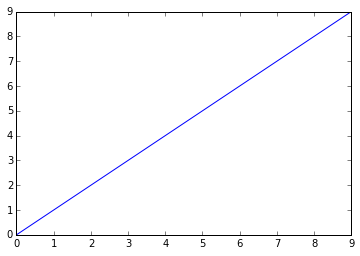

In [4]:
plt.plot(x,y)

There are some great defaults to make these plots pretty!

* ggplot emulates the most popular and beautiful plotting style in R. 
* fivethirtyeight emulates the fivethirtyeight infographic style

In [5]:
print plt.style.available

[u'dark_background', u'bmh', u'grayscale', u'ggplot', u'fivethirtyeight']


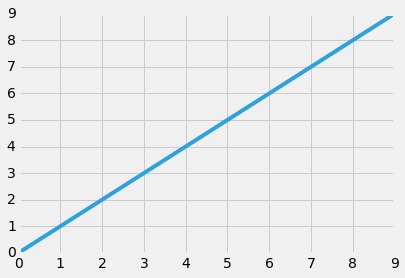

In [6]:
plt.style.use('fivethirtyeight')
plt.plot(x,y)

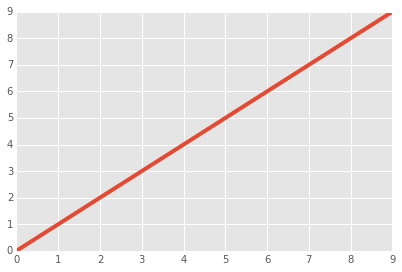

In [7]:
plt.style.use('ggplot')
plt.plot(x,y)

## Standard Additions to a Chart

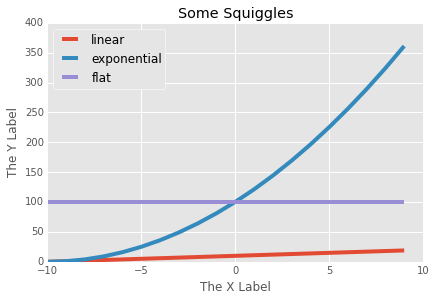

In [8]:
x = np.arange(-10,10)
a = np.arange(0,20)
b = [b**2 for b in range(0,20)]
c = [100 for c in range(0,20)]

plt.title("Some Squiggles")
plt.plot(x,a, label='linear')
plt.plot(x,b, label='exponential')
plt.plot(x,c, label='flat')
plt.legend(loc='upper left', frameon=True)
plt.ylabel('The Y Label')
plt.xlabel('The X Label')

## Scatterplots are Great!

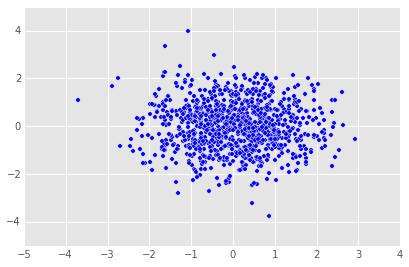

In [19]:
n = 1000
ax = np.random.randn(n)
ay = np.random.randn(n)

plt.scatter(ax, ay)

## Using Color

I like using Tableau's color set because of the visual balance. Here's how you load that into matplotlib!

In [10]:
# These are the "Tableau 20" colors as RGB.  
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.  
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)  

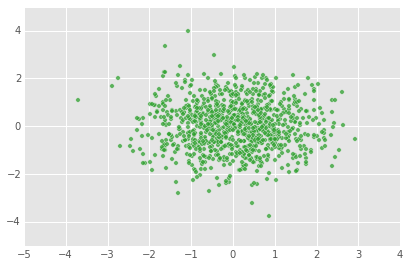

In [26]:
# c for color, alpha for transparency
plt.scatter(ax, ay, c=tableau20[4], alpha=0.75)

### Multiple series with different colors on the same plot

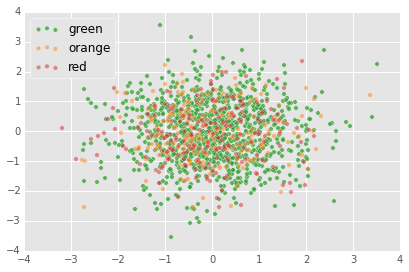

In [32]:
plt.scatter(np.random.randn(1000), np.random.randn(1000), c=tableau20[4], alpha=0.75, label="green")
plt.scatter(np.random.randn(200), np.random.randn(200), c=tableau20[2], alpha=0.5, label="orange")
plt.scatter(np.random.randn(200), np.random.randn(200), c=tableau20[6], alpha=0.5, label="red")
plt.legend(loc='upper left', frameon=True)


## Playing around with the Plot Area

### Let's make things bigger!

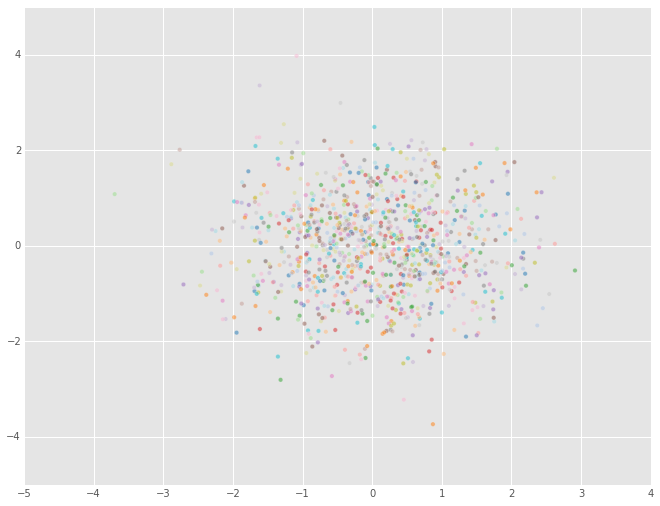

In [33]:
# set the figsize first. The figure is the canvas. Takes a tuple whose value is width, height in inches.

plt.figure(figsize=(10,8))
plt.scatter(ax, ay, c=tableau20, alpha=0.5)

### Let's create subplots!

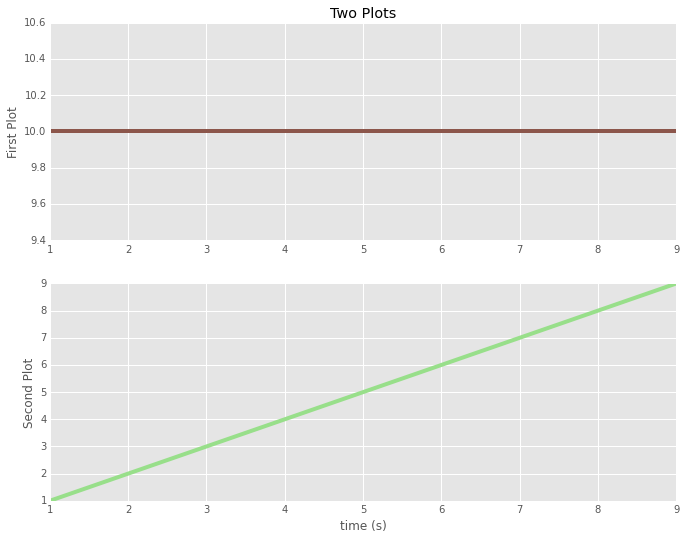

In [34]:
# this sets the figure on which we'll draw all the subplots
plt.figure(figsize=(10,8))

# data
x1 = np.arange(1,10)
y1 = [10 for y in range(1,10)]
x2 = np.arange(1,10)
y2 = np.arange(1,10)


# subplot(number_of_rows, number_of_columns, which_plot_is_this)
# which_plot_is_this starts at ONE, not at zero.
# This is terribly unpythonic because it's a Matlab convension.plt.subplot(2, 1, 1)
plt.subplot(2, 1, 1)
plt.plot(x1, y1, c=tableau20[10])
plt.title('Two Plots')
plt.ylabel('First Plot')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, c=tableau20[5])
plt.xlabel('time (s)')
plt.ylabel('Second Plot')

### Let's try 4 subplots!

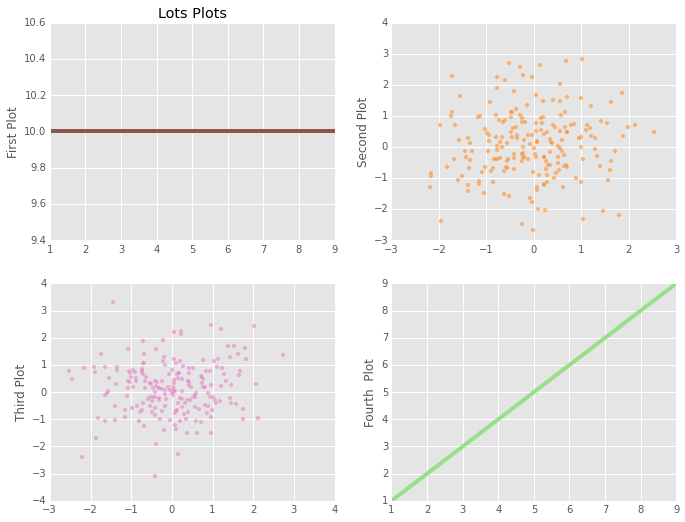

In [38]:
# this sets the figure on which we'll draw all the subplots
plt.figure(figsize=(10,8))

# data
x = np.arange(1,10)
y1 = [10 for y in range(1,10)]
y2 = np.arange(1,10)

# first subplot
plt.subplot(2, 2, 1)
plt.plot(x, y1, c=tableau20[10])
plt.title('Lots Plots')
plt.ylabel('First Plot')

# second subplot
plt.subplot(2, 2, 2)
plt.scatter(np.random.randn(200), np.random.randn(200), c=tableau20[2], alpha=0.5, label="orange")
plt.ylabel('Second Plot')

# third subplot
plt.subplot(2, 2, 3)
plt.scatter(np.random.randn(200), np.random.randn(200), c=tableau20[12], alpha=0.5, label="orange")
plt.ylabel('Third Plot')

# fourth subplot
plt.subplot(2, 2, 4)
plt.plot(x, y2, c=tableau20[5])
plt.ylabel('Fourth  Plot')

## Let's go crazy with charts!

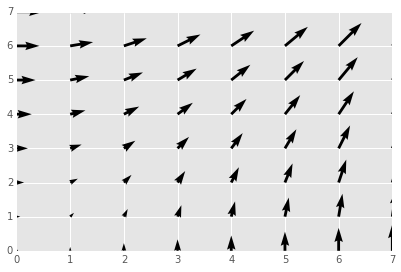

In [39]:
# quiver chart -- for vector data e.g. wind, ocean currents
n = 8
X,Y = np.mgrid[0:n,0:n]
plt.quiver(X,Y)

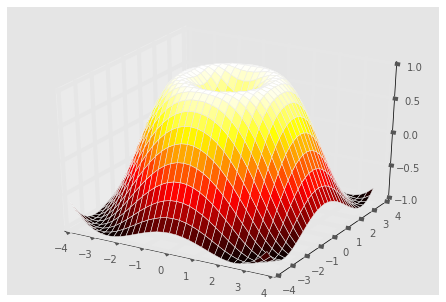

In [40]:
# countour map -- topographical data, or anything in 3 dimensions

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot')

### Plotting in Pandas

dataframe.plot() is a wrapper for plt.plot(dataframe) .... SURPRISE! Bet you thought I wasn't going to talk about pandas this time.

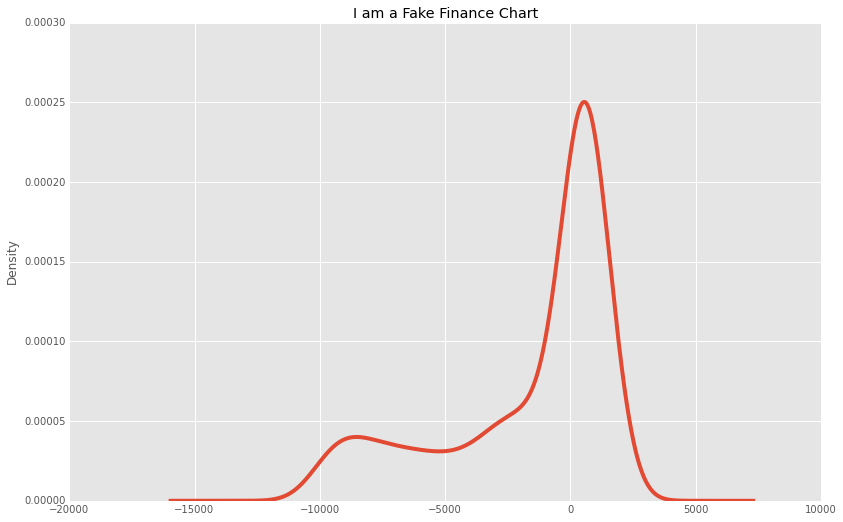

In [59]:
import pandas as pd 

plt.figure(figsize=(12,8))


ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()

ts2 = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts2 = ts.cumsum()

ts2.plot(title="I am a Fake Finance Chart", kind='kde')

## Read the Docs


* http://pandas.pydata.org/pandas-docs/stable/visualization.html
* http://matplotlib.org/

## Questions? Suggestions? 